## Chapter 07-1 인공 신경망

In [2]:
from tensorflow import keras
(train_input, train_target), (test_input,test_target)=\
    keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [4]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


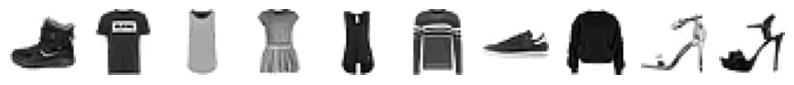

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [6]:
#티셔츠, 바지, 스웨터, 드레스, 코트, 샌달, 셔츠, 스니커즈, 가방, 앵클 부츠
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [7]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [8]:
#로지스틱 회귀

#정규화 및 1차원 배열
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1,28*28)

In [9]:
print(train_scaled.shape)

(60000, 784)


In [11]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8192833333333333


In [12]:
#입력층 : 픽셀값 자체
#출력층 : z값을 계산하여 최종값
#뉴런 : z값을 계산하는 단위
import tensorflow as tf #케라스는 텐서플로의 고수준 API
from tensorflow import keras

from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

#인공 신경망에서는 검증 세트를 별도로 덜어내어 사용
#데이터셋 충분히 크고, 교차 검증 시간 오래 걸리기 때문

#밀집층 : 픽셀과 뉴런의 연결이 밀집된 층 (or 완전 연결층)

#뉴런 개수, 뉴런의 출력에 적용할 함수, 입력의 크기
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))


#활성화 함수 : 뉴런의 선형 방정식 계산 결과에 적용되는 함수
model = keras.Sequential(dense)


In [13]:
#패션 아이템 분류하기

#케라스 모델은 훈련 전 손실 함수 적용 -> 다중 분류 크로스 엔트로피 손실함수
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

#신경망은 샘플에서 손실을 낮추기 위해 해당하는 출력을 가능한 1에 가깝게 만들어야함
#원-핫 인코딩 : 타깃값은 1, 나머지는 0

#텐서플로에서는 정수로 된 타깃값을 원-핫 인코딩 안해도 됨
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6076 - accuracy: 0.7955
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4752 - accuracy: 0.8386
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4509 - accuracy: 0.8477
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4363 - accuracy: 0.8541
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4295 - accuracy: 0.8545


In [14]:
#성능 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4402 - accuracy: 0.8468


[0.44016537070274353, 0.846750020980835]

In [ ]:
#사이킷런 : 손실 함수, 반복 횟수
#케라스 : 밀집층, 손실 함수, 에포크

## Chapter 07-2 심층 신경망

In [15]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [16]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [17]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [18]:
#심층 신경망 - 입력층, 은닉층, 출력층
#은닉층의 활성화 함수는 자유롭다, 여기서 비선형 함수 사용
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

#심층 신경망
model = keras.Sequential([dense1, dense2])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
#층을 추가하는 다른 방법
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,),
                       name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [20]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
#가장 많이 사용하는 방법
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5710 - accuracy: 0.8064
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4132 - accuracy: 0.8509
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3776 - accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3530 - accuracy: 0.8732
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3344 - accuracy: 0.8782


In [23]:
#시그모이드는 함수 양끝이 누워있기에 신속하게 대응 x
#렐루는 양수일 경우 양수값, 음수일 경우 0 반환하여 문제 해결
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) #Flatten 클래스
#이는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [25]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5291 - accuracy: 0.8113
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3924 - accuracy: 0.8580
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3524 - accuracy: 0.8718
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3319 - accuracy: 0.8819
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3147 - accuracy: 0.8867


In [26]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3833 - accuracy: 0.8680


[0.38328105211257935, 0.8679999709129333]

In [27]:
#하이퍼파라미터

#은닉층의 개수, 은닉층의 뉴런 개수, 활성화 함수, 층의 종류

#밀집층을 다룸
#옵티마이저 : 다양한 종류의 경사 하강법 알고리즘

#SGD, sgd=keras.optimizers.SGD(learning_rate=0.1) 도 가능
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')


In [28]:
#기본 경사 하강법 옵티마이저는 모두 SGD 클래스
#매개변수 기본값 0보다 크면 모멘텀 최적화(보통 0.9이상)
#nesterov 매개변수 True로 바꾸면 네스테로프 모멘텀 최적화
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)
#이는 모멘텀 최적화를 2번 반복하여 구현

#적응적 학습률 : 모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있다.
#Adagrad, RMSprop - 옵티마이저의 종류
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

#Adam - 모멘텀 + RMSprop 접목
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

model.evaluate(val_scaled, val_target)


Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5262 - accuracy: 0.8154
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3940 - accuracy: 0.8589
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3546 - accuracy: 0.8702
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3284 - accuracy: 0.8794
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.3509 - accuracy: 0.8751


[0.3508651852607727, 0.875083327293396]

## Chapter 07-3 신경망 모델 훈련

In [29]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [30]:
#손실 곡선
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [31]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model

In [32]:
model = model_fn()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

#verbose는 훈련 과정 출력 조절 (0~2)
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [34]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


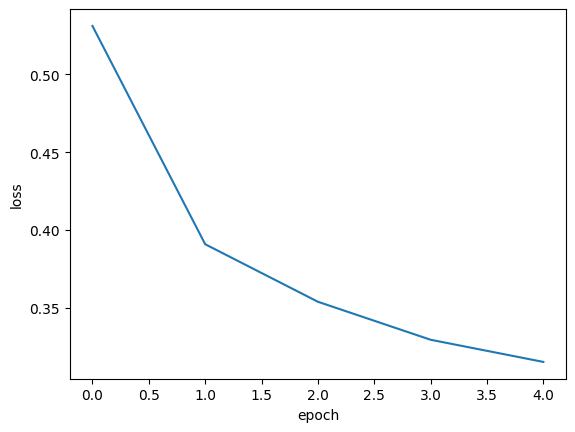

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

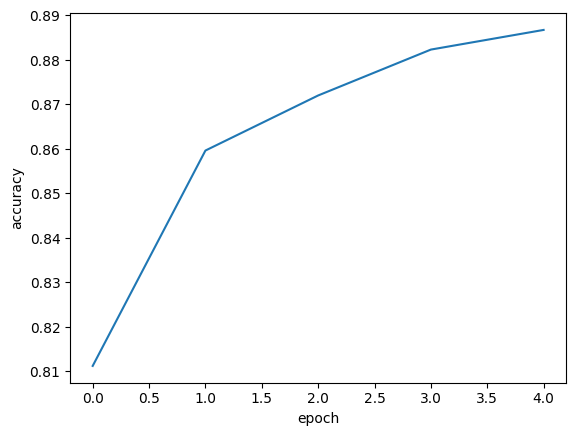

In [36]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [37]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

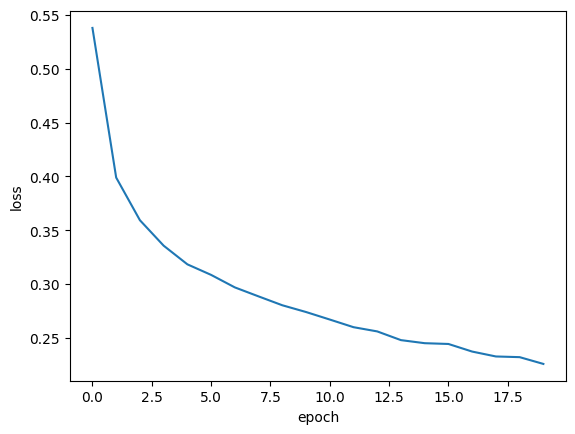

In [38]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [39]:
#검증 손실 - 과대적합, 과소적합 평가
#모델의 정확도는 손실 함수의 값을 확인하는 것이 정확도보다 나음
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

#validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 전달
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [41]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


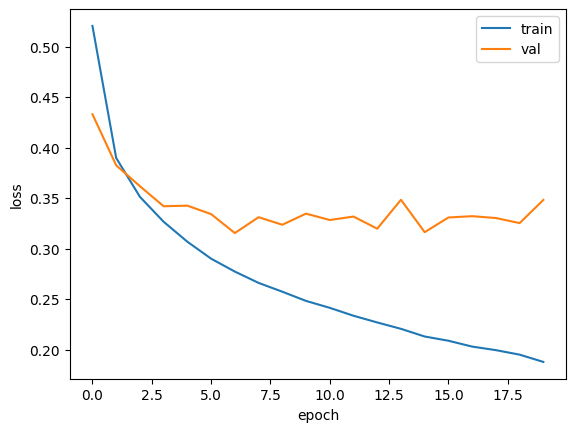

In [42]:
#검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 손실 감소 및 정확도 증가
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [44]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

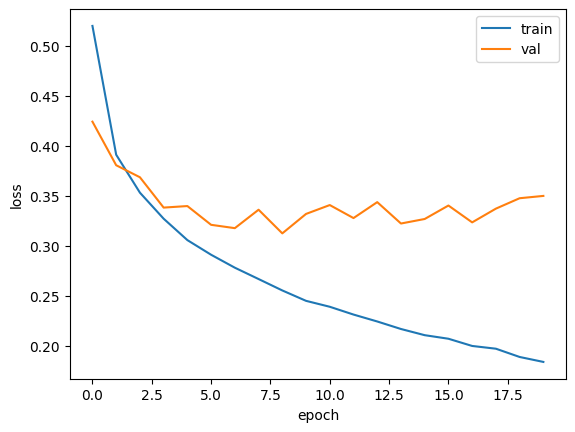

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [46]:
#드롭아웃 : 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합 막음
#이는 하이퍼파라미터로 고름
#드롭아웃으로 특정 뉴런에 과대하게 의존하는 것 줄이고 모든 입력에 주의 기울임

#드롭아웃 층은 따로 파라미터가 없다. 또한 입력과 출력 크기 같다.
#훈련이 끝난 뒤에 평가나 예측할 땐 드롭아웃x -> 모든 뉴런 사용해야 예측 수행 가능
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

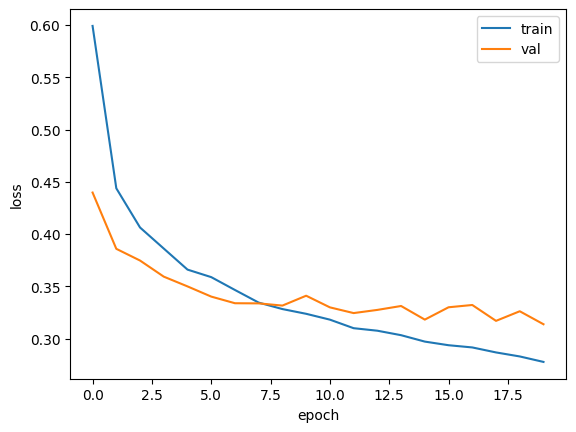

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [50]:
#모델 저장과 복원
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [51]:
#훈련된 모델의 파라미터 저장
model.save_weights('model-weights.h5')
#모델 구조와 모델 파라미터 함께 저장
model.save('model-whole.h5')


c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
#훈련하지 않은 새로운 모델을 만들고 훈련된 파라미터 읽어서 사용
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model-weights.h5')

In [53]:
import numpy as np

#정확도만 계산
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 2ms/step
0.8778333333333334


In [58]:
import os

# 파일 경로에서 한글이나 특수 문자 제거
model_file_path = b'./model-whole.h5'

if not os.path.exists(model_file_path):
    print("모델 파일이 존재하지 않습니다.")
else:
    # 모델 로드
    model = keras.models.load_model(model_file_path)
    model.evaluate(val_scaled, val_target)

OSError: Unable to load model. Filepath is not an hdf5 file (or h5py is not available) or SavedModel. Received: filepath=b'./model-whole.h5'

In [59]:
#콜백 : 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
#기본적으로 에포크마다 모델을 저장, 가장 낮은 검증 점수를 만드는 모델 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd5 in position 29: invalid continuation byte

In [61]:
#조기 종료 : 검증 점수 상승하기 시작하면 과대적합 커지기에 조기에 종료
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
#조기 종료, 2번 연속 검증 점수 향상되지 않으면 훈련 중지, 가장 낮은 검증 손실 낸 모델로 돌림
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [62]:
print(early_stopping_cb.stopped_epoch)

7


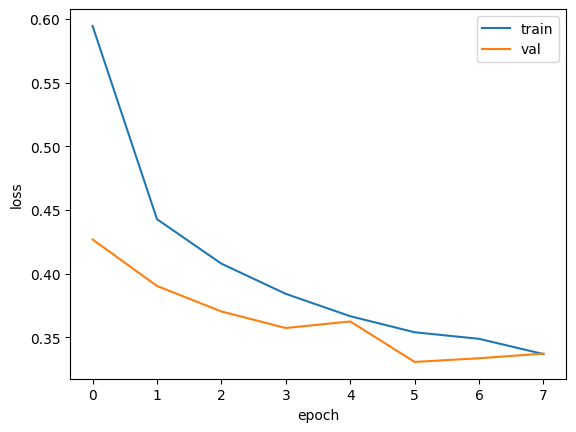

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [64]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3307 - accuracy: 0.8768


[0.3307071030139923, 0.8768333196640015]